# Learn to use NAIP Multiband RS Images

## What is NAIP?

NAIP is a great source of high res imagery across the US. NAIP imagery is often collected with just a RGB bands. However, some lfights include  a NIR band which is very useful for quantifying vegetation cover and health.

## Open NAIP data

You will use NAIP imagery for the COldsprings fire study area in Colorado. TO work with multi-band raster data you will use the rasterio and geopandas packages. You will also use the plot module from earthpy package for raster plotting.

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep

# Get the data
data = et.data.get_data("cold-springs-fire")

# Set work dir
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["axes.titlesize"] = 20

Extracted output to C:\Users\s1526\earth-analytics\data\cold-springs-fire\.


To begin, you will use the rasterio open function to open the multi-band NAIP image

rio.open("path-to-tif-file-here")

Remember that it is ideal to use a context manager to open raster data in Python. This ensures that the data connection is properly closed.

with rio.open("path-here") as src:

Where serc can be whatever variable name you select to store the raster object.

In [3]:
naip_csf_path = os.path.join("data", "cold-springs-fire", 
                             "naip", "m_3910505_nw_13_1_20150919", 
                             "crop", "m_3910505_nw_13_1_20150919_crop.tif")

with rio.open(naip_csf_path) as src:
    naip_csf = src.read()
    naip_csf_meta = src.meta

Above you imported a geotiff like you've done before. but this file is different. Notice the shape of the resulting numpy array.

In [4]:
naip_csf.shape

(4, 2312, 4377)

You can plot a single band in the NAIp raster using imshow(). However, now that you hav emultiple layers or bands, you need to tell imshow() what layer you wish to plot. Use arrayname[0] to plot the 1st band of the image.

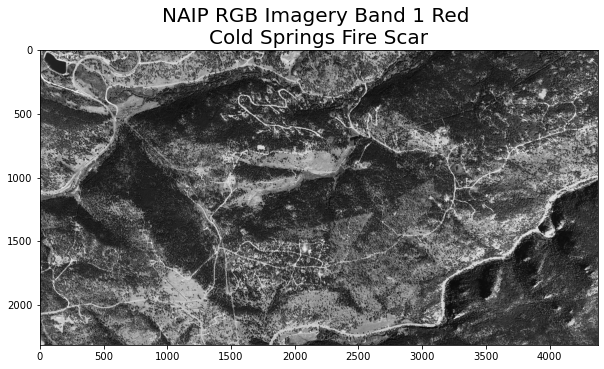

In [5]:
fig, ax = plt.subplots()

ax.imshow(naip_csf[0],
         cmap="Greys_r")

ax.set_title("NAIP RGB Imagery Band 1 Red \nCold Springs Fire Scar")

plt.show()

Or you can use the earthpy function plot_bands(). Note that in this lesson, you will first be shown how to use earthpy to plot multiband rasters. The earthpy package was developed to make it easier to work with spatial data in Python.

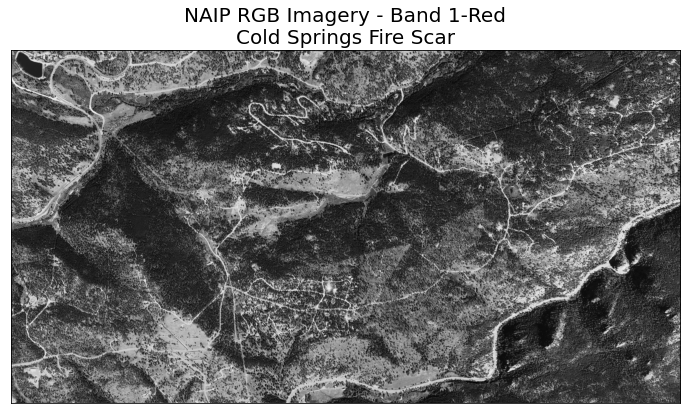

In [6]:
ep.plot_bands(naip_csf[0],
             title="NAIP RGB Imagery - Band 1-Red\nCold Springs Fire Scar",
             cbar=False)

plt.show()

In [8]:
naip_csf_meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 4377,
 'height': 2312,
 'count': 4,
 'crs': CRS.from_wkt('PROJCS["UTM Zone 13, Northern Hemisphere",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(1.0, 0.0, 457163.0,
        0.0, -1.0, 4426952.0)}

### Image raster data values

Next, examine the raster's min and max values. What is the value range?

In [9]:
# View min and max value
print(naip_csf.min())
print(naip_csf.max())

17
242


This raster contains value between 0 and 255. These values represent degrees of brightness associated with the image band. In the case of a RGB image (RGB).

To plot an RGB image, we mix red + greem + blue values, using the ratio of each. The ratio of each colour is determined by how much light was recorded (the reflectance value) in each band. This mixture creates 1 single colour that, in turn, makes up the full colour image - similar to the colour image that your camera phone creates.

## 8 vs 16 bit images

It's important to note that this image is an 8 bit image. This means that all values in the raster are stored within a range of 0:255. This differs from a 16-bit image, in which values can be stored within a range of 0:65, 535.

### Import a specific band

You can plot a single band of your choice using numpy indexing. naip_csf[1] will access just the 2nd band - which is the green band when using NAIP data.

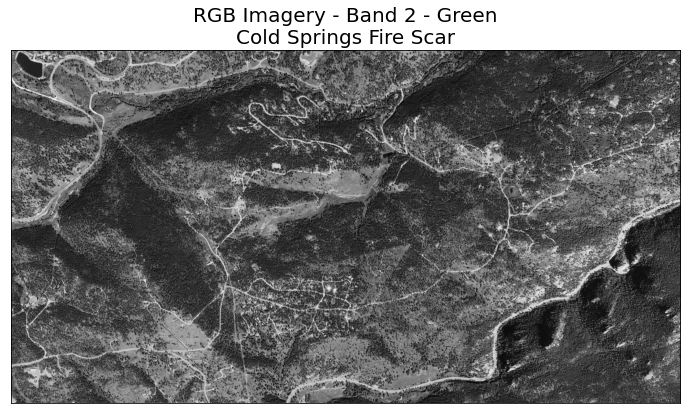

In [10]:
# Plot band 2 - green
ep.plot_bands(naip_csf[1],
             title="RGB Imagery - Band 2 - Green\nCold Springs Fire Scar",
             cbar=False)

plt.show()

## Rasters and numpy arrays - A review

Remember that when you import a raster dataset into Python, the data are converted to a numpy array. A numpy array has no inherent spatial info attached to it and is just a matrix of values. This makes processing the data fast.

The spatial info for the raster is stored in a .meta attribute. This metadata allows you to export the data as a geotiff or other spatial format.

### Plot raster band images

Next plot each band in the raster. This is another intermediate step (like plotting histograms) that you might want to do when you 1st expore and open your data. Earthpy contains a plot_bands() function that allows you to quickly plot each band indivudally.

Similarly to plotting a single band, in each band "colour", the brightest pixels are 
lighter in colour or white representing a stronger reflectance for that colour on that pixel. The darkest pixels are darker to black in colour representing less reflectance of that colour in that pixel.

### Plot bands using earthpy

You can use the earthjpy package to plot a single or all bands in your array. To use earthpy call:

ep.plot_bands()

plot_bands() takes several key arguments including:
- arr: an n-dim numpy array to plot.
- figsize: a tuple of 2 values representing the x and y dim of the image.
- cols: if you are plotting more than 1 band you can specify the number of columns in the grid that you#d like to plot.
- title: OPTIONAL - A single title for 1 band or  alist of x titles for x bands in your array.
- cbar: OPTIONAL - ep.plot_bands() by default will add a colorbar to each plot it creates. You can turn the colourbar off by setting this argument to false.

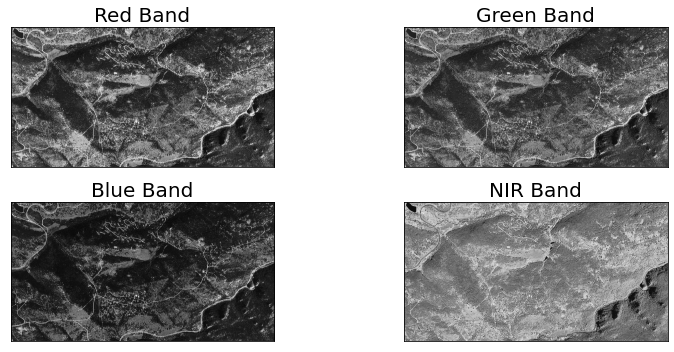

In [11]:
titles = ["Red Band", "Green Band", "Blue Band", "NIR Band"]

# Plot all bands using the earthpy function
ep.plot_bands(naip_csf,
             figsize=(12, 5),
             cols=2,
             title=titles,
             cbar=False)

plt.show()

## Plot RGB data

You will learn how to plot an RGB composite image.

![RGB_stack](RGB_stack.jpeg)

You can use the Earthpy functions called plot_rgb() to quickly plot 3 band composite images. This function has several key arguments including
- arr: a numpy array in rasterio band order (bands first)
- rgb: the 3 bands that you wish to plot on the RGB channels respectively
- title: OPTIONAL - if you want to add a title to your plot.

Similar to plotting with geopandas, you can provide an ax= argument as well to plot your data on a particular matplotlib axis.

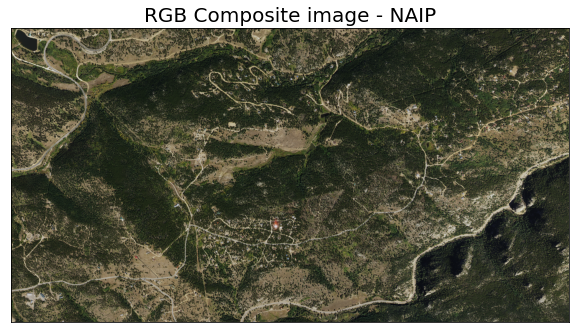

In [12]:
ep.plot_rgb(naip_csf,
           rgb=[0, 1, 2],
           title="RGB Composite image - NAIP")

plt.show()

Optionally, you can alos provide the bands that you wish to plot, the title and the fig size.

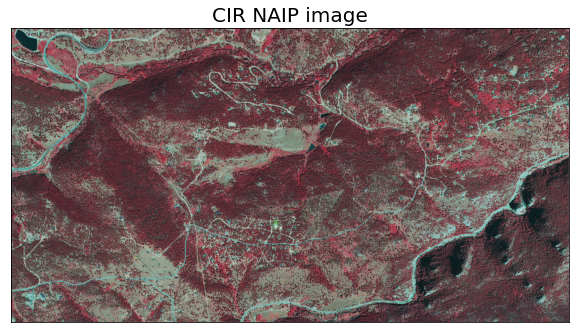

In [14]:
ep.plot_rgb(naip_csf, title="CIR NAIP image",
           rgb=[3, 0, 1],
           figsize=(10, 8))

plt.show()

## How plot_rgb() works

To render a 3 band, colour image in Python, you can use the imshow() function. imshow allows you to identify what bands you want to render in the RGB regions.

To ensure that the image plots and is scaled correctly, you will use the bytescale() function which used to be part of sci-py/sci-image. Scipy deprecated this function so we've added it to the earthpy package for you to use in this course

The code will look something like this:

ax.imshow(es.bytescale(naip_csf.read()[:3].transpose([1, 2, 0]))

where:
- ax.imshow() is the call to plot the image
- et.spatial.bytescale() ensures that teh values in the image are sketched between 0 and 255 which is the range that our monitor can recognise.

IMPORTANT: when plotting in python, it is important that you TRANSPOSE the data. The data are read in with the bands FIRST and then the rows and columns. However imshow expects to find the individual bands last. We adjst the dim of the data using:

transpose([])

# Plot the first 3 bands of the raster (r,g,b bands)
fig, ax = plt.subplots()
ax.imshow(es.bytescale(naip_csf)[:3].transpose([1, 2, 0]))
plt.show()


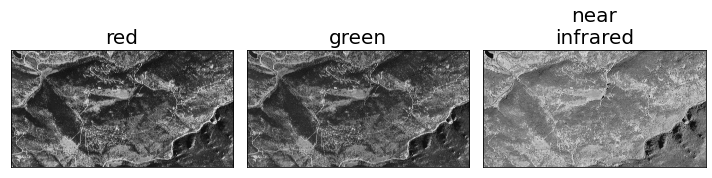

In [17]:
titles = ["red", "green", "near\ninfrared"]
ep.plot_bands(naip_csf[[0, 1, 3]],
             figsize=(10, 7),
             title=titles,
             cbar=False)

plt.show()

## Image stretch to increase contrast

You can explore whether applying a sketch to the image improves clarity and contrast

![raster-image-stretch-dark](raster-image-stretch-dark.jpg)
![raster-image-stretch-light](raster-image-stretch-light.jpg)

Below you use the skimage package to contrast stretch each band in your data to make the whites more bright and the blacks more dark.

In the example below you only stretch bands 0, 1, and 2 which are teh RGB bands. To begin,
1. preallocate an array of 0 that is the same shape as your numpy array.
2. then look through each band in the image and rescale it.

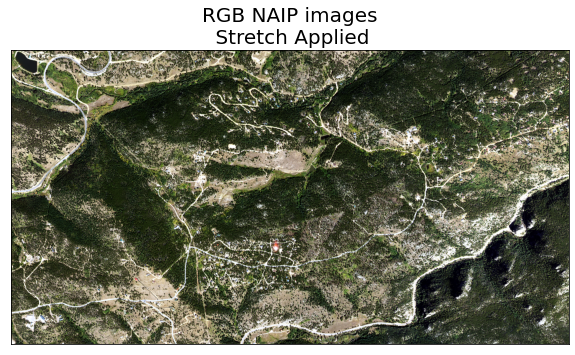

In [18]:
band_indices = [0, 1, 2]

# Apply stretch using the earthpy plot_rgb function
ep.plot_rgb(naip_csf,
           rgb=band_indices,
           title="RGB NAIP images\n Stretch Applied",
           figsize=(10, 8),
           stretch=True)

plt.show()

## Multiband raster histograms

Just like you did with the single band rasters, you can view histogram of each band in your data using matplotlib. Below you loop through each band or layer in the number array and plot the distribution of reflectance values.

You can use the ep.hist() function in earthpy to plot histograms for all bands in your raster .hist() accepts several key arguments including
- arr: a numpy array in rasterio band order (bands first)
- colors: a list of colours to use for each histogram.
- title: plot titles to use for each histogram.
- cols: the number of columns for the plot grid.

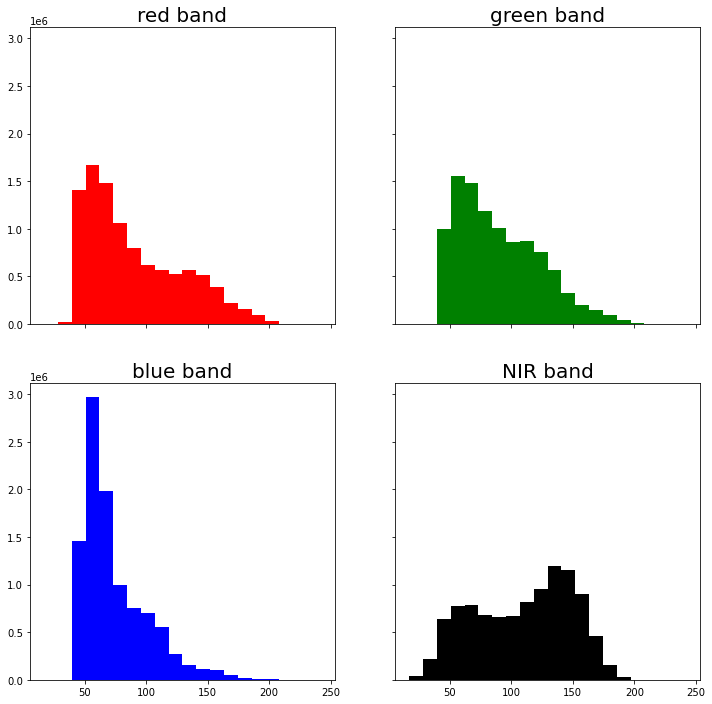

In [19]:
# Create a colours and titles list to use in the histogram, then plot
colours = ["r", "g", "b", "k"]
titles = ["red band", "green band", "blue band", "NIR band"]

ep.hist(naip_csf,
       colors=colours,
       title=titles,
       cols=2)

plt.show()

## How the hist function is built

If you want to understand how the hist() works, here you can loop through all of the bands and plot the histogram for each one.

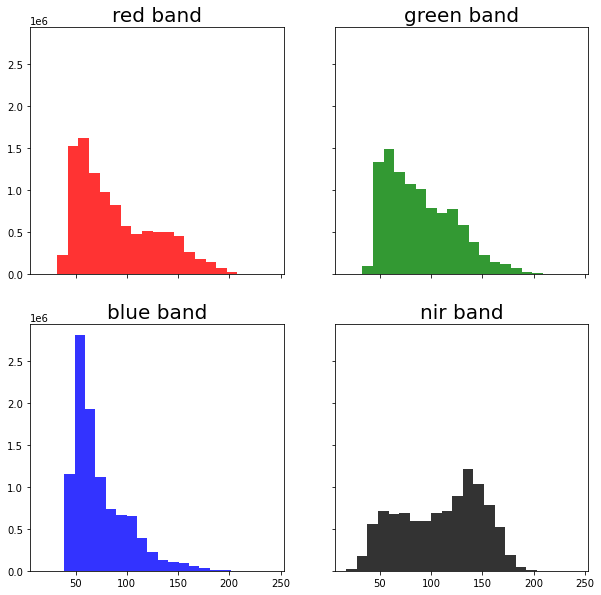

In [20]:
colors = ['r', 'g', 'b', 'k']
titles = ['red band', 'green band', 'blue band', 'nir band']

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

for band, color, the_title, ax in zip(naip_csf, colors, titles, axs.ravel()):
    ax.hist(band.ravel(), bins=20, color=color, alpha=.8)
    ax.set_title(the_title)